<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Dennis Goßler [11140150]
* Date: 27.10.2023

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from scipy.stats import norm
np.random.seed(1)

In [42]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

def plot_gaussian_distribution(data, bins=30, show=True, save_path=None):
    try:

        
        # Select the specified column and drop missing values
        column_data = data
        
        # Calculate the mean and standard deviation of the column
        mu = column_data.mean()
        sigma = column_data.std()
        
        # Generate data points for the x-axis
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        
        # Calculate the probability density function (PDF) for each x value
        pdf = norm.pdf(x, mu, sigma)
        
        # Create the histogram
        plt.hist(column_data, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
        
        # Create the Gaussian plot
        plt.plot(x, pdf, linewidth=2, color='r', label=f'Gaussian Distribution\n$\mu={mu:.2f}, \sigma={sigma:.2f}$')
        
        # Add labels and title
        plt.xlabel(column_name)
        plt.ylabel('Density')
        plt.title(f'Gaussian Normal Distribution of {column_name}')
        plt.legend()
        
        if show:
            plt.grid(True)
            plt.show()
        plt.close()
        
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")



## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


lower limit= 17.30122479
upper limit= 502.45319721
Anomalies: Cholesterol= []


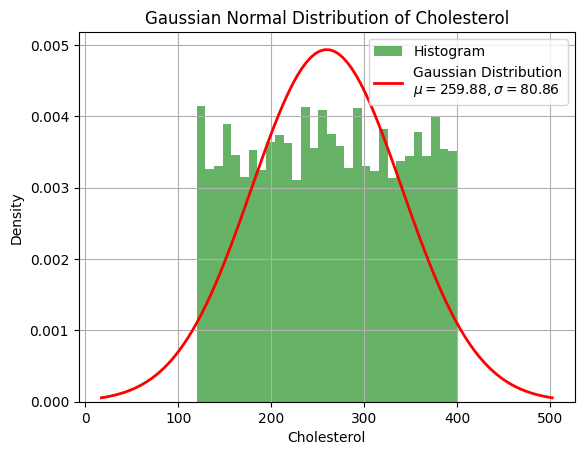

In [43]:
file_path = "data/D1-HeartAttackRist/heart_attack_prediction_dataset.csv"
column_name = "Cholesterol"

d1 = pd.read_csv(file_path)
data = d1[column_name].dropna()
print( "Anomalies: Cholesterol=", find_anomalies(data))
plot_gaussian_distribution(data)

0        275000.0
1        241935.0
2        230000.0
3        225000.0
4        225000.0
           ...   
12627      1254.0
12628      1245.0
12629    152950.0
12630    193125.0
12631    327500.0
Name: Base Pay, Length: 12632, dtype: float64
lower limit= -31725.38019251
upper limit= 146876.98183913
Anomalies: Base Pay= [275000.0, 241935.0, 230000.0, 225000.0, 225000.0, 222100.0, 220000.0, 220000.0, 218956.0, 207568.0, 207197.0, 206196.0, 205000.0, 202430.0, 200820.0, 200366.0, 199477.0, 198956.0, 195118.0, 192610.0, 190668.0, 190668.0, 187204.0, 183799.0, 182900.0, 182000.0, 182000.0, 181847.0, 180883.0, 180250.0, 180030.0, 178879.0, 178048.0, 177000.0, 176474.0, 176025.0, 175004.0, 175000.0, 172500.0, 172458.0, 171981.0, 171198.0, 168152.0, 167197.0, 166860.0, 166800.0, 165456.0, 164158.0, 163584.0, 163129.0, 163000.0, 163000.0, 161264.0, 160000.0, 159931.0, 159486.0, 159486.0, 159486.0, 159486.0, 159486.0, 159485.0, 159479.0, 158620.0, 158401.0, 157548.0, 155681.0, 155475.0, 154110

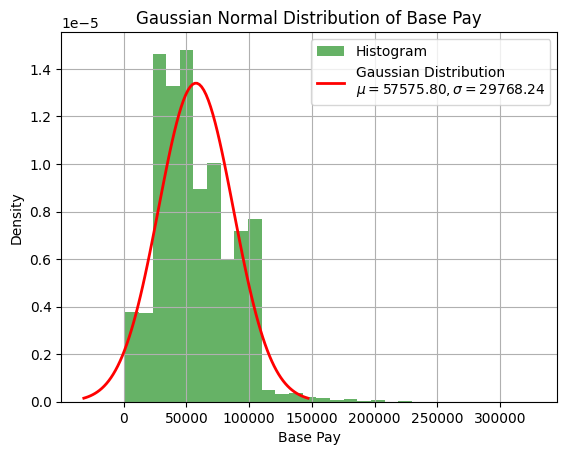

In [47]:
file_path = "data/D2-MedianAndAvgHourlyWages/2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv"
column_name = "Base Pay"

d1 = pd.read_csv(file_path)
data = d1[column_name].dropna().replace('[\$,]', '', regex=True).astype(float)
print(data)
print( "Anomalies: Base Pay=", find_anomalies(data))
plot_gaussian_distribution(data)

lower limit= -12.2069173
upper limit= 72.75209802
Anomalies: Base Pay= [76.0]


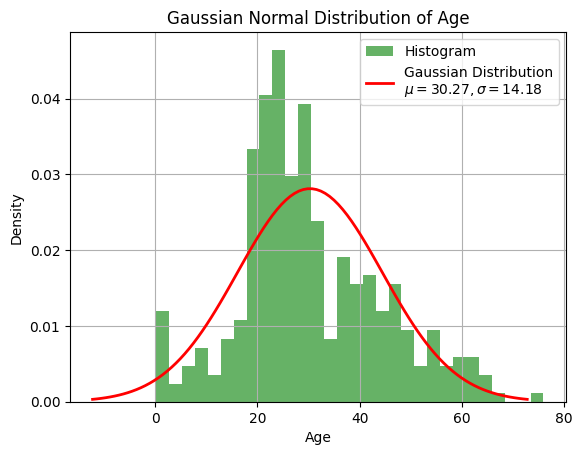

In [57]:
file_path = "data/D3-Titanic/titanic.csv"
column_name1 = "Age"
column_name2 = "Age"

d1 = pd.read_csv(file_path)
data = d1[column_name].dropna()
print( "Anomalies: Base Pay=", find_anomalies(data))
plot_gaussian_distribution(data)